In [ ]:
%pip install tensorflow matplotlib tensorflow-datasets


In [ ]:
pip install tensorflow matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
import tensorflow_datasets as tfds
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.JLKNL6_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
IMG_SIZE = (128, 128)

def format_image(image, label):
    image = tf.image.resize(image, IMG_SIZE) / 255.0
    return image, label

train_ds = train_ds.map(format_image).batch(32).prefetch(1)
val_ds = val_ds.map(format_image).batch(32).prefetch(1)


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 461s 789ms/step - accuracy: 0.9416 - loss: 0.1496 - val_accuracy: 0.7539 - val_loss: 0.8816
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 450s 774ms/step - accuracy: 0.9622 - loss: 0.1012 - val_accuracy: 0.7511 - val_loss: 1.0295
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 440s 755ms/step - accuracy: 0.9678 - loss: 0.0881 - val_accuracy: 0.7397 - val_loss: 1.3434
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 444s 759ms/step - accuracy: 0.9771 - loss: 0.0669 - val_accuracy: 0.7515 - val_loss: 1.3346
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 498s 753ms/step - accuracy: 0.9844 - loss: 0.0470 - val_accuracy: 0.7485 - val_loss: 1.4927


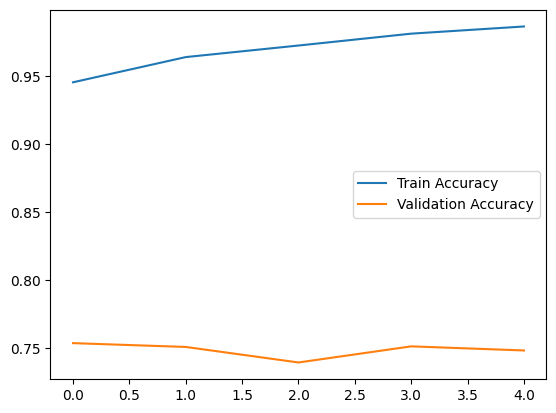

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
